# **Decision Trees**
# ***2.3 Audio Data (Drum Sounds)***

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline 

from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#Load Data
audio_data = pd.read_csv('/content/audio_data.csv') # This time you should drop two columns first: filename and label

In [ ]:
audio_data.head()

,Unnamed: 0,filename,label_text,label,0.00 hz,86.13 hz,172.27 hz,258.40 hz,344.53 hz,430.66 hz,...,10249.80 hz,10335.94 hz,10422.07 hz,10508.20 hz,10594.34 hz,10680.47 hz,10766.60 hz,10852.73 hz,10938.87 hz,11025.00 hz
0,0,70Funk.wav,snare,0,0.117469,0.201065,3.666227,7.554432,5.356165,2.470225,...,0.000272,0.000199,0.000083,0.000071,0.000068,0.000041,0.000003,5.277616e-07,1.054685e-07,7.286777e-09
1,1,8oh8 Rim.wav,snare,0,0.003148,0.012814,0.375678,1.050320,0.164903,0.089524,...,0.001122,0.000737,0.000304,0.000211,0.000128,0.000036,0.000006,1.266412e-06,1.366164e-07,3.532417e-09
2,2,8oh8 Tin.wav,snare,0,0.006759,0.039368,0.385903,0.254091,0.086651,0.137728,...,0.000633,0.000391,0.000169,0.000128,0.000074,0.000024,0.000003,7.285032e-07,7.223851e-08,2.491626e-09
3,3,8oh8 Snr.wav,snare,0,0.003083,0.001359,0.021241,0.053261,0.026645,0.393541,...,0.004249,0.002850,0.001079,0.000781,0.000527,0.000161,0.000024,5.044927e-06,5.018216e-07,5.197483e-08
4,4,9oh9 Rim.wav,snare,0,0.006571,0.007394,0.033357,0.458574,1.056414,0.435841,...,0.000267,0.000211,0.000077,0.000065,0.000033,0.000008,0.000003,7.358946e-07,4.149365e-08,3.860568e-09


In [ ]:
# Split between target and feature
X = audio_data.iloc[:, 4:133] # Feature Selection
y = audio_data['label']

In [ ]:
# Desing Decision tree here 80% training 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 15) 

#Create a loop of max depth from 1 to 16 similar to previous step and plot the accuracy 
train_errors = list()
test_errors = list()

for x in range(1,15): # Tree depth is varied in a loop from 3 to 10
  
  #Create multiple models here each based on the x variable above
  clf = tree.DecisionTreeClassifier(max_depth=x)
  clf = clf.fit(x_train,y_train)

  # Store the result of modes in train_erors and test_errors variables
  train_errors.append(clf.score(x_train, y_train)) # Train Accuracy
  test_errors.append(clf.score(x_test, y_test))    # Test Accuracy


Text(0, 0.5, 'Performance')

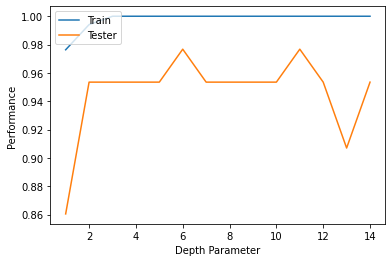

In [ ]:
# Plot of test and training errors
plt.plot(range(1,15),train_errors, label='Train')
plt.plot(range(1,15),test_errors, label='Tester')
plt.legend(loc='upper left')
plt.xlabel('Depth Parameter')
plt.ylabel('Performance')

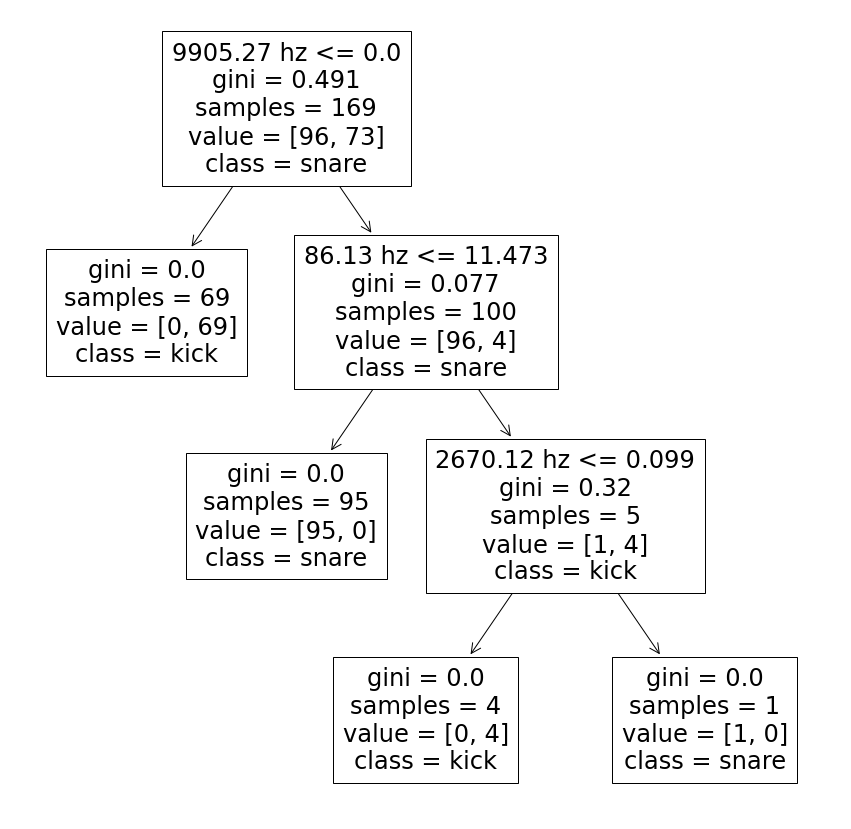

In [ ]:
# Draw the decision tree plot with max_depth=5
cl2 = tree.DecisionTreeClassifier(max_depth=5)
cl2 = cl2.fit(x_train,y_train)

# Grab Feature col names for tree plot
lst = X.columns.values 

# Plot the decision tree
fig,ax = plt.subplots(figsize = (15,15))
treeplot = tree.plot_tree(cl2, feature_names=lst,
class_names = ['snare', 'kick'],ax=ax)


In [ ]:
cl2.score(x_test, y_test)

0.9534883720930233

**Dropping a training example from data**

In [ ]:
X_dropped = X.drop(1)
y= pd.Series(y)
y_drop = y.drop(1)
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_drop, test_size=0.20, random_state=42)  

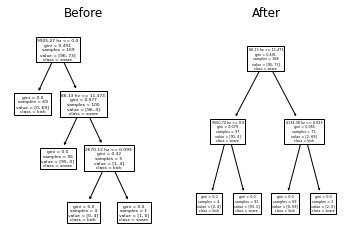

In [ ]:
sound_tree2 = tree.DecisionTreeClassifier(max_depth=5) # model with max_depth = 5 
sound_tree2 = sound_tree2.fit(X_train,y_train)
plt.subplot(1, 2, 1)
treeplot = tree.plot_tree(cl2, feature_names=lst,
class_names = ['snare', 'kick'])
plt.title("Before")
plt.subplot(1, 2, 2)
treeplot2 = tree.plot_tree(sound_tree2,  feature_names=lst,
class_names = ['snare', 'kick'])
plt.title("After")
plt.show()


In [ ]:
# Accuracy
sound_tree2.score(x_test, y_test)

1.0

Text(0.5, 1.0, 'Before')

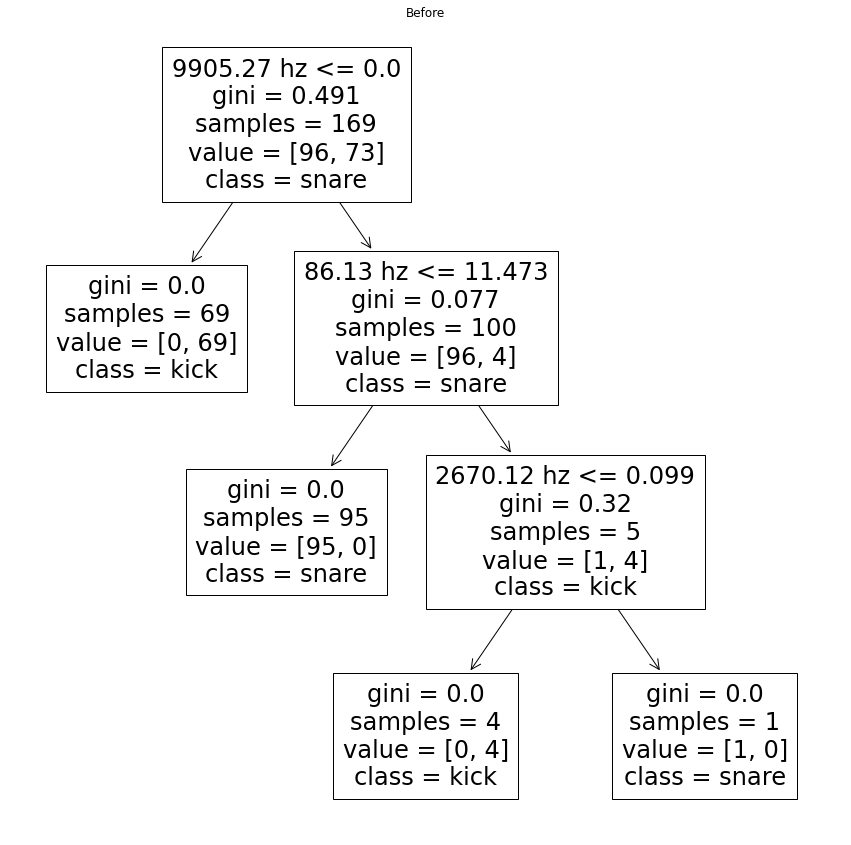

In [ ]:
# Before Plot Zoomed in
fig,ax = plt.subplots(figsize = (15,15))
treeplot = tree.plot_tree(cl2, feature_names=lst,
class_names = ['snare', 'kick'],ax=ax)
plt.title("Before")

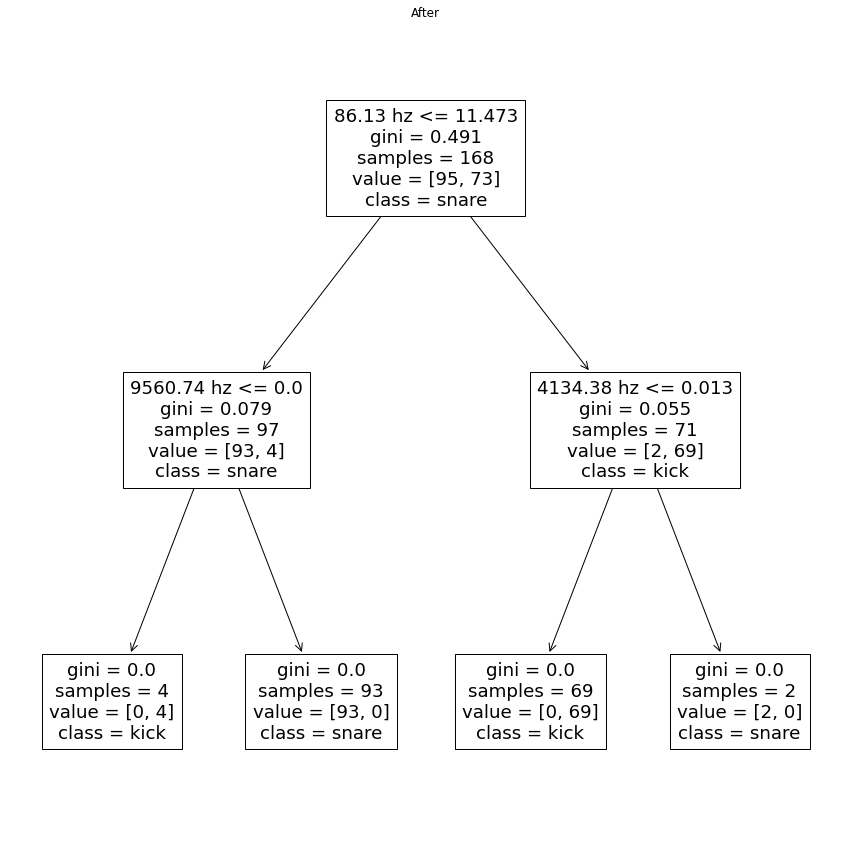

In [ ]:
# After plot zoomed in
fig2,ax = plt.subplots(figsize = (15,15))
treeplot2 = tree.plot_tree(sound_tree2,  feature_names=lst,
class_names = ['snare', 'kick'])
plt.title("After")
plt.show()